In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the data and creating the data frame

url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv'
loan_df = pd.read_csv(url, sep=',')
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Unique values in each column

loan_df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [4]:
# Converting labels of categorical variables with 2 to 4 levels into numeric values

loan_df['Gender'] = loan_df['Gender'].map({'Male': 1, 'Female': 0})
loan_df['Married'] = loan_df['Married'].map({'Yes': 1, 'No': 0})
loan_df['Education'] = loan_df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
loan_df['Property_Area'] = loan_df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
loan_df['Loan_Status'] = loan_df['Loan_Status'].map({'Y': 1, 'N': 0})
loan_df['Self_Employed'] = loan_df['Self_Employed'].map({'Yes': 1, 'No': 0})

In [5]:
# Data

loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [6]:
# Statstical Analysis of the data frame

loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,601.0,0.813644,0.389718,0.0,1.0,1.0,1.00,1.0
Married,611.0,0.651391,0.476920,0.0,0.0,1.0,1.00,1.0
Education,614.0,0.781759,0.413389,0.0,1.0,1.0,1.00,1.0
Self_Employed,582.0,0.140893,0.348211,0.0,0.0,0.0,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Property_Area,614.0,1.037459,0.787482,0.0,0.0,1.0,2.00,2.0


In [7]:
# Shape of the data frame, 614 shows number of rows and 13 shows number of columns

loan_df.shape

(614, 13)

In [8]:
# Calcuating null values in the data

loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Since no column has null values more than 50% of the rows of the data, so we cannot drop any column straight forward, we have to do modifications for all those columns

# Replacing Null values in LoanAmount with mean value of the column

for i in loan_df.columns:
    loanamt_mean = loan_df['LoanAmount'].mean()
    loan_df['LoanAmount'].fillna(loanamt_mean, inplace=True)

# Replacing Null values of other columns with the Backward fill method (Value of next non-null value)

loan_df['Gender'].fillna(method='bfill', inplace=True)
loan_df['Married'].fillna(method='bfill', inplace=True)
loan_df['Dependents'].fillna(method='bfill', inplace=True)
loan_df['Self_Employed'].fillna(method='bfill', inplace=True)
loan_df['Loan_Amount_Term'].fillna(method='bfill', inplace=True)
loan_df['Credit_History'].fillna(method='bfill', inplace=True)

loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# Datatypes of columns in the dataframe

loan_df.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents            object
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

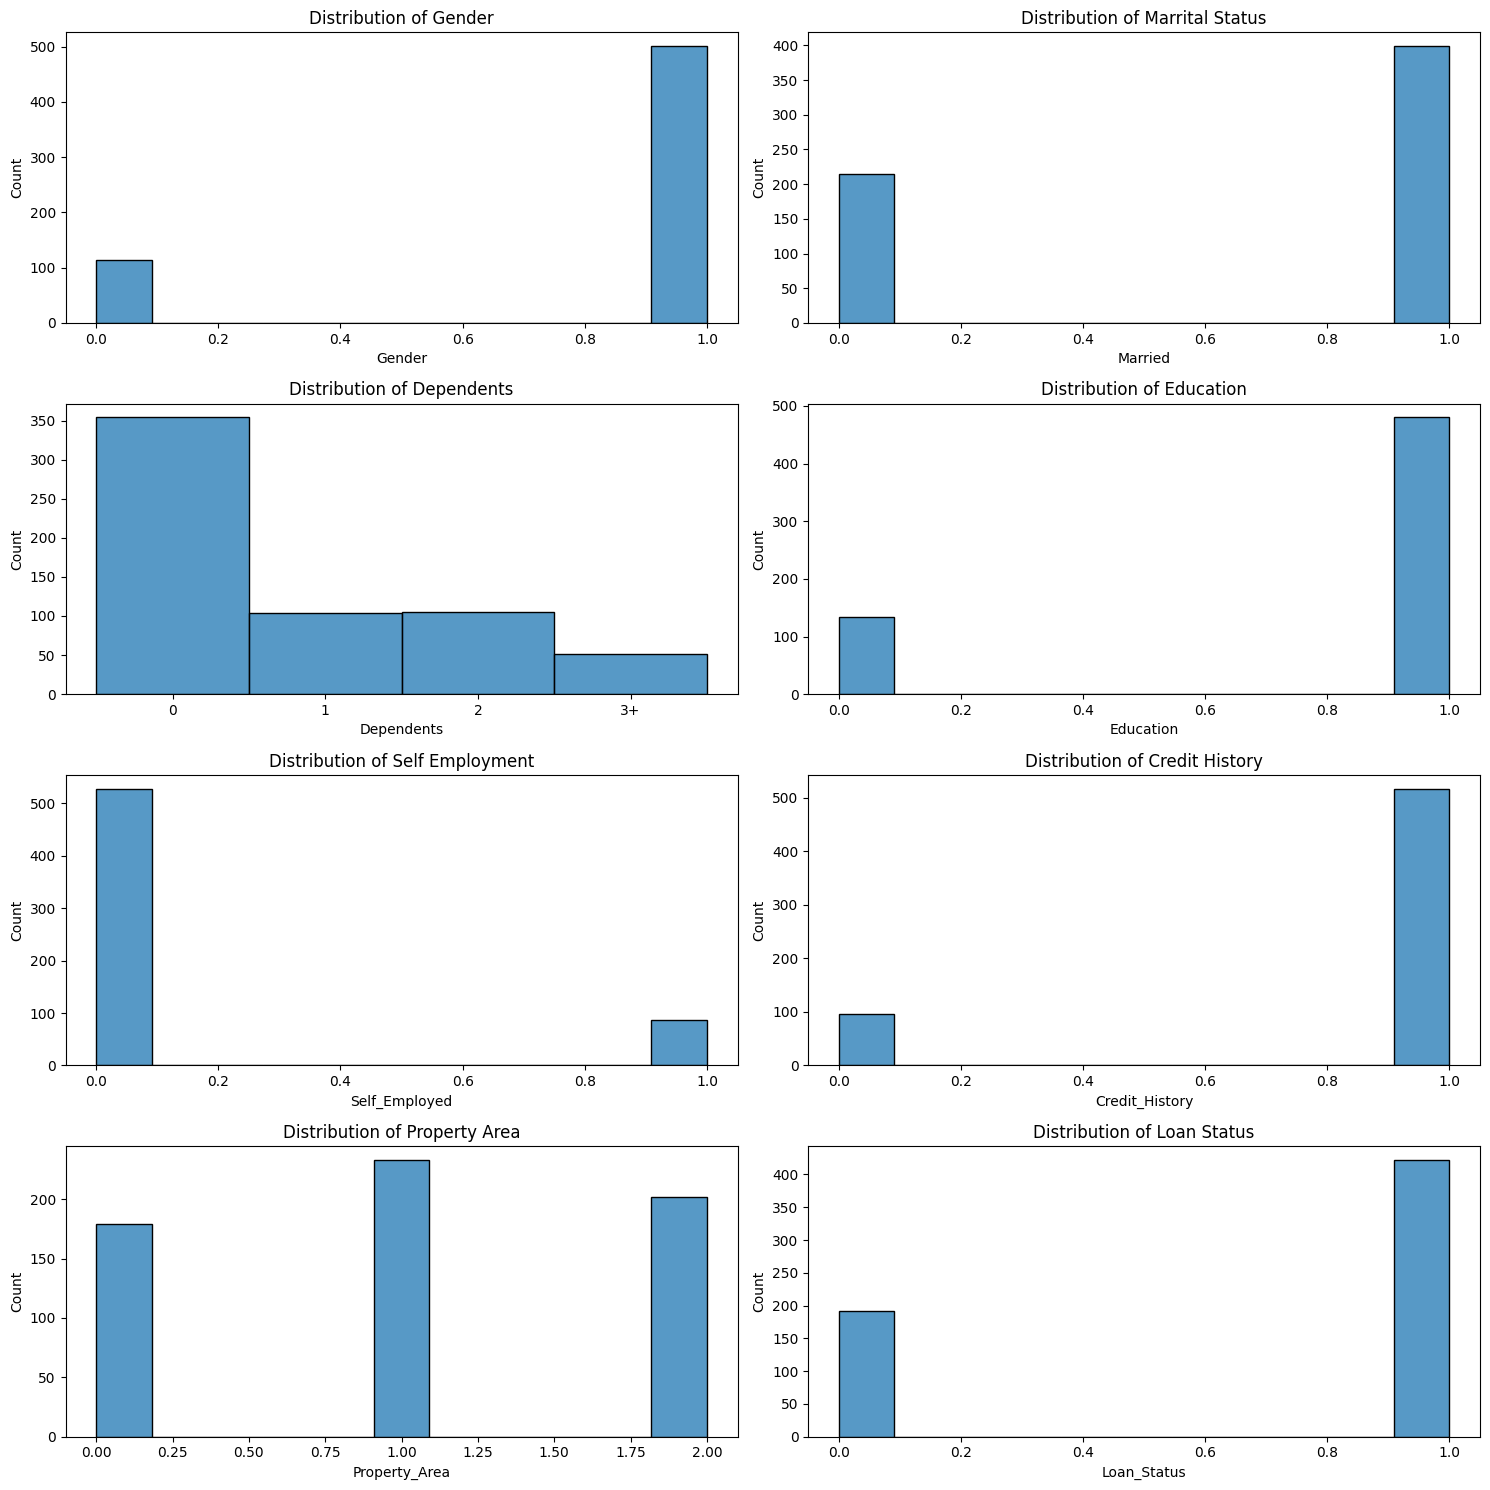

In [11]:
# 2x2 grid for subplots

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Visualize how job satisfaction changes with change in Job level

sns.histplot(loan_df['Gender'], ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Gender')

sns.histplot(loan_df['Married'], ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Marrital Status')

sns.histplot(loan_df['Dependents'], ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Dependents')

sns.histplot(loan_df['Education'], ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Education')

sns.histplot(loan_df['Self_Employed'], ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Self Employment')

sns.histplot(loan_df['Credit_History'], ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Credit History')

sns.histplot(loan_df['Property_Area'], ax=axes[3, 0])
axes[3, 0].set_title('Distribution of Property Area')

sns.histplot(loan_df['Loan_Status'], ax=axes[3, 1])
axes[3, 1].set_title('Distribution of Loan Status')

plt.tight_layout()
plt.show()

In [12]:
# Dropping unnecessary columns

loan_df.drop(['Loan_ID', 'Dependents'], axis=1, inplace = True)

In [13]:
# Correlation Heatmap

import plotly.figure_factory as ff
corrs_2 = loan_df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs_2.values,
    x=list(corrs_2.columns),
    y=list(corrs_2.index),
    annotation_text=corrs_2.round(2).values,
    showscale=True)
figure.show()

## In order to build model, we have to build four models, one will be Logistic Regression, and other three will be modified by the class balancing techniques inclusive of Oversampling, Undersampling and SMOTE as this data contains class imbalance, which is evident from the histograms plotted above.

### Logistic Regression

In [14]:
# Extracting dependent and independent variables

X = loan_df.drop('Loan_Status', axis=1)
y = loan_df['Loan_Status']

In [15]:
# split into 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 111)

In [16]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

predictions = model1.predict(X_test)

# print classification report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.41      0.56        59
           1       0.78      0.98      0.87       126

    accuracy                           0.79       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.81      0.79      0.77       185



### Oversampling

In [17]:
print('Original dataset shape %s' % Counter(y))
random_state = 111
rus = RandomOverSampler(random_state=random_state)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 422, 0: 192})
Resampled dataset shape Counter({1: 422, 0: 422})


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=10)
logreg = LogisticRegression(solver='newton-cg', C=10, penalty='l2', class_weight='balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.57      0.70       137
           1       0.65      0.93      0.76       117

    accuracy                           0.74       254
   macro avg       0.78      0.75      0.73       254
weighted avg       0.79      0.74      0.73       254



### Undersampling

In [19]:
print('Original dataset shape %s' % Counter(y))
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 422, 0: 192})
Resampled dataset shape Counter({0: 192, 1: 192})


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=156)
logreg = LogisticRegression(solver='newton-cg', C=10, penalty='l2', class_weight='balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.44      0.60        52
           1       0.68      0.97      0.80        64

    accuracy                           0.73       116
   macro avg       0.80      0.71      0.70       116
weighted avg       0.79      0.73      0.71       116



### SMOTE

In [21]:
print('Original dataset shape %s' % Counter(y))
rus = SMOTE(random_state=123)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 422, 0: 192})
Resampled dataset shape Counter({1: 422, 0: 422})


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.62      0.70       127
           1       0.69      0.85      0.76       127

    accuracy                           0.74       254
   macro avg       0.75      0.74      0.73       254
weighted avg       0.75      0.74      0.73       254

